## 단순회귀분석 구현하기(삼성전자, kospi)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 한글포트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2021-01-01', '2023-12-31')

# 수정종가 데이터 가져오기
df = stock_price['Adj Close']

# 수익률 데이터로 변경하기
df = stock_price["Adj Close"].pct_change()*100
df = df.dropna()

[*********************100%%**********************]  2 of 2 completed


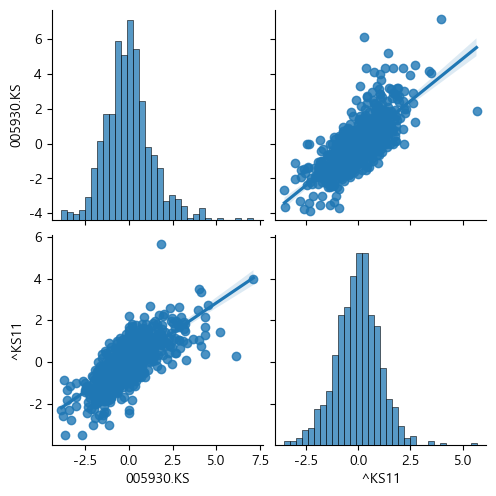

In [70]:
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(df, kind='reg')
plt.show()

In [71]:
import statsmodels.api as sm

# 회귀 분석을 위해 X에 상수항 추가
df_const = sm.add_constant(df['005930.KS'])

# 회귀 모델 적합
model = sm.OLS(df['^KS11'], df_const)
results = model.fit()

# 잔차 계산
residuals = results.resid

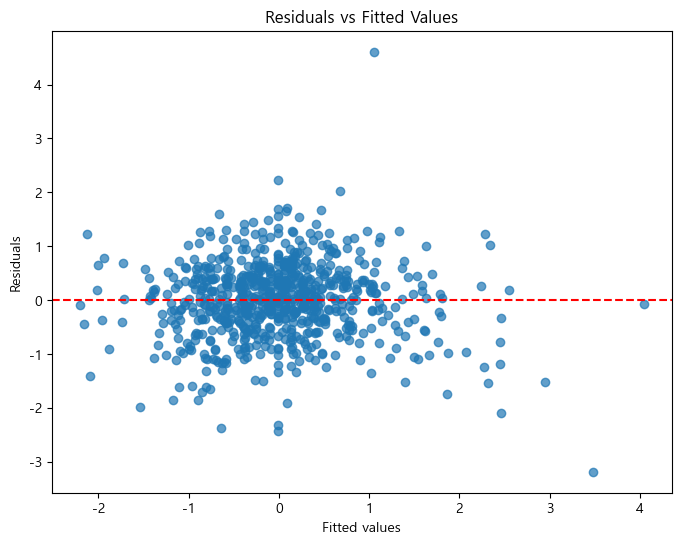

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

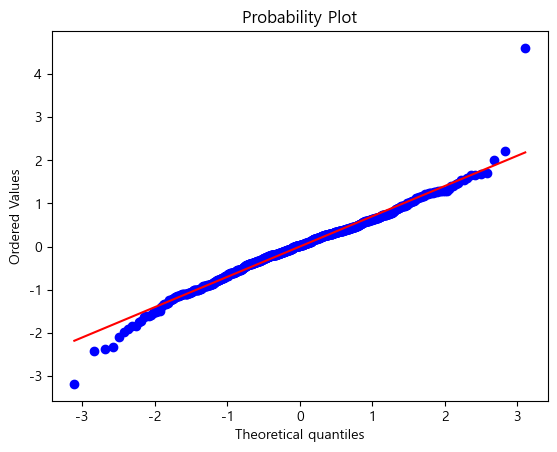

In [73]:
from scipy import stats

stats.probplot(residuals,dist=stats.norm,plot=plt)
plt.show()

In [74]:
from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

Shapiro-Wilk test statistic: 0.9762288928031921, p-value: 1.4414620608249606e-09


In [75]:
# 독립성 검증 (Durbin-Watson 통계량)
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.951488940662671


In [76]:
import statsmodels.api as sm

feature_add = sm.add_constant(df["005930.KS"], has_constant='add')

# sm OLS 적합
model = sm.OLS(df["^KS11"] , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     906.2
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          2.77e-130
Time:                        14:37:48   Log-Likelihood:                -792.35
No. Observations:                 736   AIC:                             1589.
Df Residuals:                     734   BIC:                             1598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0144      0.026     -0.550      0.583      -0.066       0.037
005930.KS      0.5698      0.019     30.103      0.000       0.533       0.607
==============================================================================
Omnibus:                       55.964   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.852
Skew:                           0.025   Prob(JB):                     3.08e-58
Kurtosis:                       5.938   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# 월 수익률로 변경해서 진행해보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 한글포트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2021-01-01', '2023-12-31',"M")

# 수정종가 데이터 가져오기
df = stock_price['Adj Close']

# 월말 데이터로 변환
df_month= df.resample('M').last()
df_month

# 수익률 구하기
df_month = df_month.pct_change()*100
df_month.dropna(inplace=True)
df_month.head()

[                       0%%                      ]

[*********************100%%**********************]  2 of 2 completed


Ticker,005930.KS,^KS11
Date,,
2021-02-28,0.609761,1.234456
2021-03-31,-0.894889,1.608721
2021-04-30,0.122866,2.823532
2021-05-31,-1.227000,1.780886
2021-06-30,0.692281,2.895204


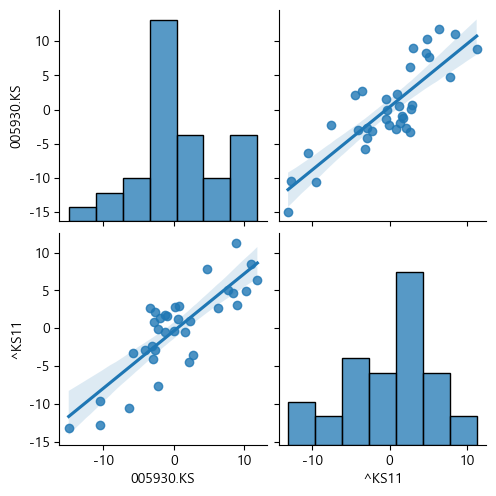

In [78]:
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(df_month, kind='reg')
plt.show()

In [79]:
import statsmodels.api as sm

# 회귀 분석을 위해 X에 상수항 추가
df_const = sm.add_constant(df_month['005930.KS'])

# 회귀 모델 적합
model = sm.OLS(df_month['^KS11'], df_const)
results = model.fit()

# 잔차 계산
residuals = results.resid

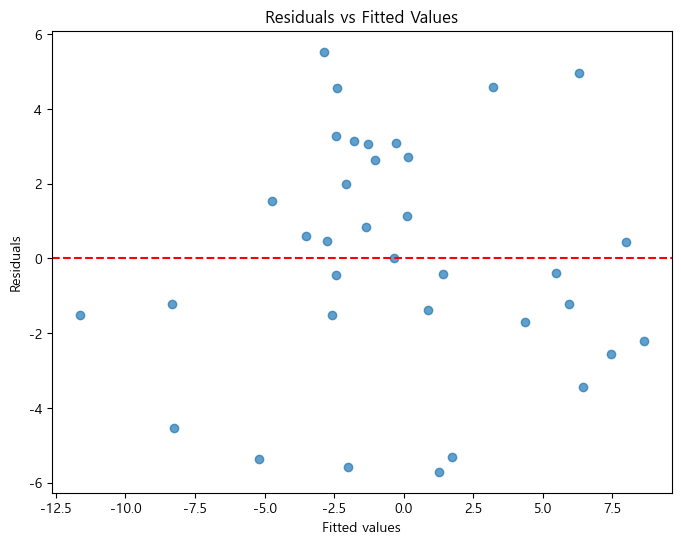

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

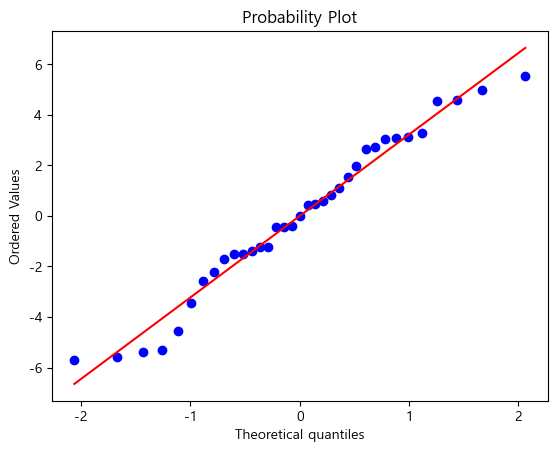

In [81]:
from scipy import stats

stats.probplot(residuals,dist=stats.norm,plot=plt)
plt.show()

In [83]:
from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')


Shapiro-Wilk test statistic: 0.9644724726676941, p-value: 0.3100360631942749


In [85]:
# 독립성 검증 (Durbin-Watson 통계량)
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.9148468569011423


In [86]:
import statsmodels.api as sm

feature_add = sm.add_constant(df_month["005930.KS"], has_constant='add')

# sm OLS 적합
model = sm.OLS(df_month["^KS11"] , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     74.98
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           5.23e-10
Time:                        14:42:09   Log-Likelihood:                -89.345
No. Observations:                  35   AIC:                             182.7
Df Residuals:                      33   BIC:                             185.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3511      0.541     -0.649      0.521      -1.452       0.750
005930.KS      0.7567      0.087      8.659      0.000       0.579       0.935
==============================================================================
Omnibus:                        1.336   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.055
Skew:                          -0.177   Prob(JB):                        0.590
Kurtosis:                       2.227   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""